                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

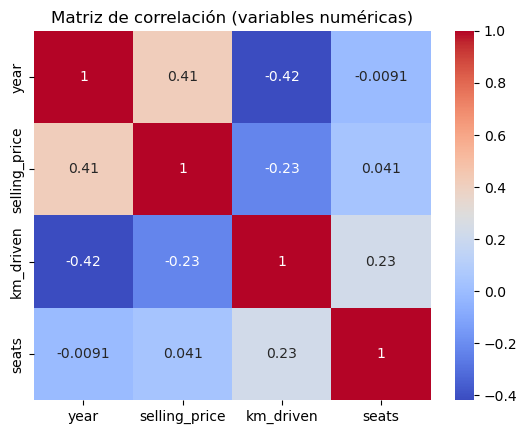

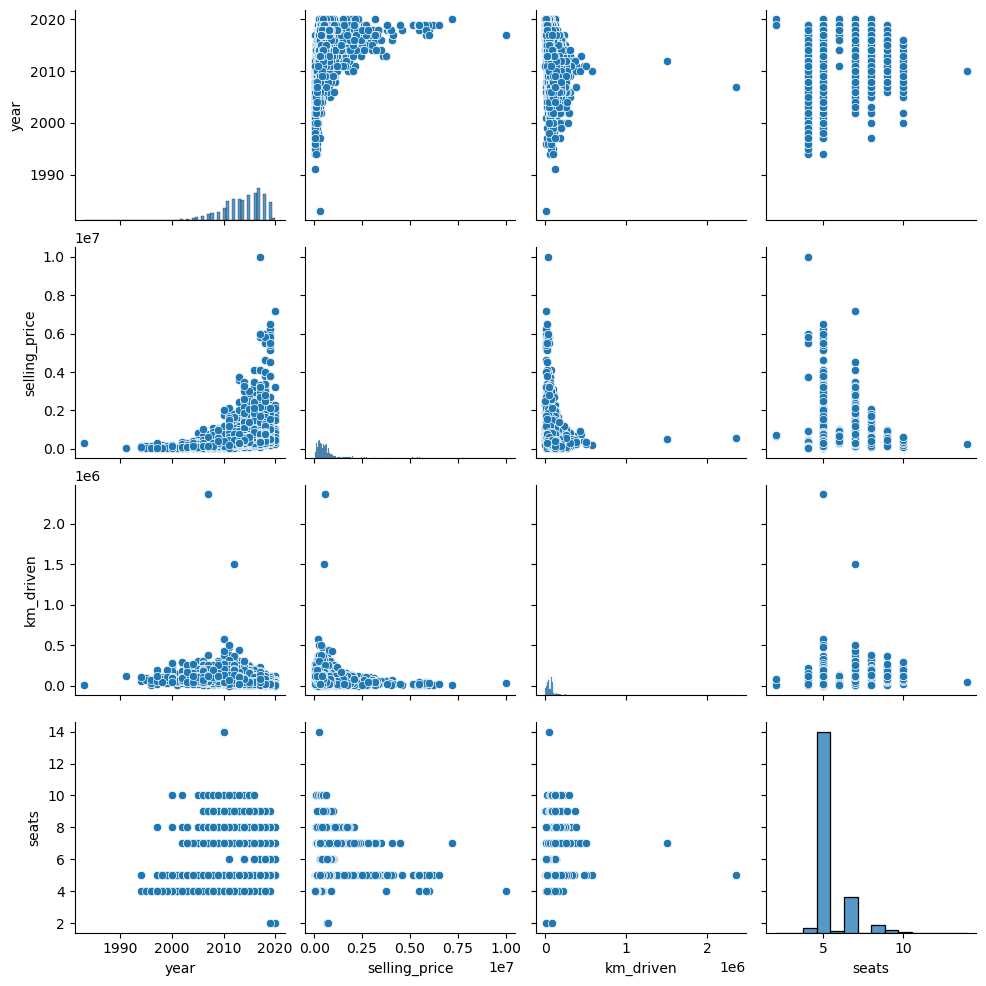

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('C:\\Analisis de datos\\Car details v3.csv')

# Vista general
print(df.head())
print(df.info())
print(df.describe())

# Ver correlaciones
# Filtrar solo columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Ver correlaciones solo entre columnas numéricas
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación (variables numéricas)')
plt.show()


# Gráficos individuales
sns.pairplot(df)
plt.show()


In [3]:
# Revisar valores nulos
print(df.isnull().sum())

# Eliminar duplicados, filas nulas, etc.
df.dropna(inplace=True)

# Convertir columnas categóricas
df = pd.get_dummies(df, drop_first=True)


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [5]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = modelo.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))


MSE: 23072907052.77807
R²: 0.9668150872274048


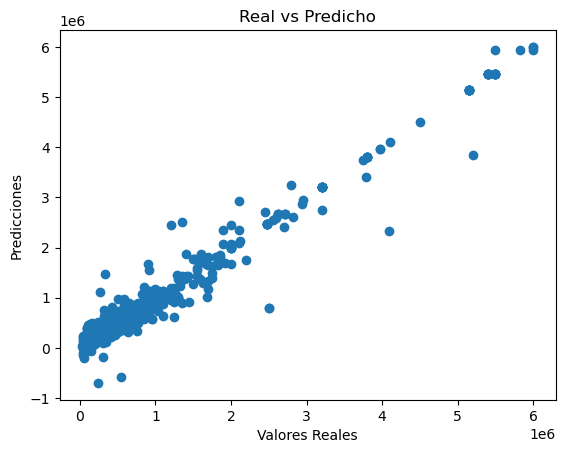

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Real vs Predicho')
plt.show()
